In [50]:
# ALL imports will be in this cell
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, RFE, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score as auc
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from seaborn import heatmap as hm

import matplotlib.pyplot as plt
import xgboost as xgb

import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

import time
%matplotlib inline

I will load the training dataset and view it, just to get an idea of the dataset.

In [2]:
# Since loading the dateset takes 'some' time, I will leave it in a seperate cell
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3   ...    \
0                      0.0                      0.0   ...     
1                      0.0                      0.0   ...     
2                      0.0                      0.0   ...     
3                      0.0                      0.0   ...     
4                      0.0                      0.0   ...     

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [3]:
df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3      ...       \
count             76020.000000             76020.000000      ...        
mean                  0.412946                 0.567352      ...        
std                  30.604864                36.513513      ...        
min                   0.000000                 0.000000      ...        
25%                   0.000000                 0.000000      ...        
50%                   0.000000                 0.000000      ...        
75%                   0.000000                 0.000000      ...        
max                6600.000000              6600.000000      ...        

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3       

<br>
### Var3 attribute looks like its has some extreme values that might disturb the training proccess, I will take a look on the rest of the attributes.
<br>

In [4]:
# looks like var3 has an extreme value, I will look for extreme values that
# might disturb the training proccess

count_odd = 0
odd_feat = []
for i in df.columns.tolist():
    max_of_i = df[i].max()
    min_of_i = df[i].min()
    mean_of_i = df[i].mean()
    std_of_i = df[i].std()
    if min_of_i < -10000 or max_of_i > 10000:
        count_odd += 1
        odd_feat.append(i)
#         print("Column: %s, Min: %.2f, Mean: %.2f, Max: %.2f, Std: %.2f"%(i, X[i].min(), X[i].mean(), X[i].max(), X[i].std()))
#         print("Column: %s, Min: %.2f, Mean: %.2f, Max: %.2f, Std: %.2f"%(i, min_of_i, mean_of_i, max_of_i, std_of_i)) # you took an algorithms course, you should know better, Abdulellah!
        odd_feat.append("Column: %s, Min: %.2f, Mean: %.2f, Max: %.2f, Std: %.2f"%(i, min_of_i, mean_of_i, max_of_i, std_of_i))
print(count_odd)

126


### So, theres 126 attributes with large (either positive or negative) values, which makes me guess that the values of var3 won't have as much effect as I thought.

In [5]:
# look for constant columns
const_columns = []
for col in df.columns:
    if df[col].std() == 0:
        const_columns.append(col)
print("There are {} constant columns.".format(len(const_columns)))

# this is the dataframe with constant columns removed
df = df.drop(const_columns, axis=1)
df_test = df_test.drop(const_columns, axis=1)

# look at the data again
df.columns.tolist()

There are 34 constant columns.


['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26'

In [6]:
# looking for dublicate columns
# wow_test = np.array(X['var3'])
length = len(df.columns.tolist())
duplicates = []
for i in range(length-1):
    comparer = df[df.columns.tolist()[i]] # man I'm running out of variable names
    for j in range(i+1, length):
        comparee = df[df.columns.tolist()[j]]
        if np.array_equal(comparer, comparee):
            duplicates.append(df.columns.tolist()[j])
print("There are %d duplicate columns"%len(duplicates))
df = df.drop(duplicates, axis=1)
df_test = df_test.drop(duplicates, axis=1)
print(df.shape)
print(df_test.shape)

There are 29 duplicate columns
(76020, 308)
(75818, 307)


In [7]:
satisfied = (df.TARGET == 0).sum()
disatisfied = (df.TARGET == 1).sum()

# percentages
total = len(df)
sat_percentage = (satisfied/total)*100
dis_pre = (disatisfied/total)*100
print("There are {} customers that are satasfied with the banking services, while {} are not.".format(satisfied, disatisfied))
print("{:.2f}% of the customer are satisfied".format(sat_percentage))
print("{:.2f}% of the customer are satisfied".format(dis_pre))

There are 73012 customers that are satasfied with the banking services, while 3008 are not.
96.04% of the customer are satisfied
3.96% of the customer are satisfied


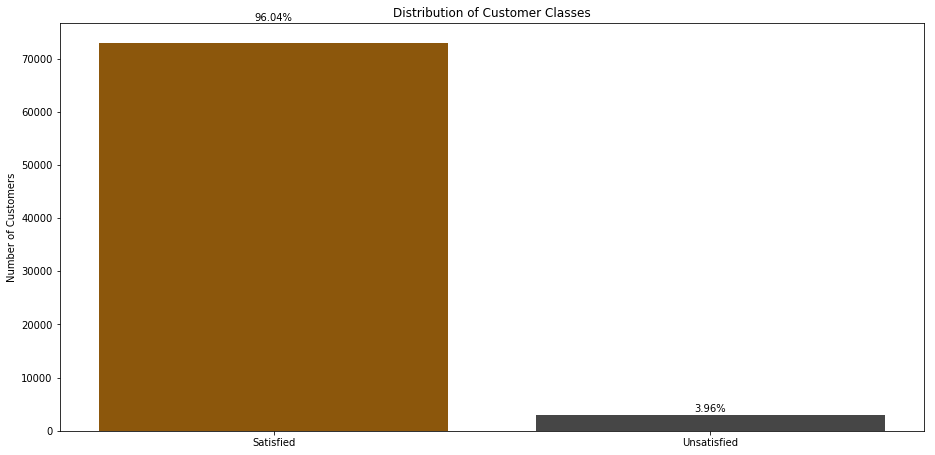

In [8]:
fig, ax = plt.subplots()
ax.set_title('Distribution of Customer Classes')
ax.set_ylabel('Number of Customers')
barbar = ax.bar(['Satisfied', 'Unsatisfied'], [satisfied, disatisfied],
            color=[[140/255,87/255,12/255], [70/255,70/255,70/255]])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '{:.2f}%'.format((height/len(df))*100),
                ha='center', va='bottom')
autolabel(barbar)
fig.set_size_inches(15.5, 7.5)

In [9]:
X = df.drop(['ID', 'TARGET'], axis=1)
y = df['TARGET']

test_on = df_test.drop('ID', axis=1)
id_test = df_test['ID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
print("acc: {}".format(acc))

# preformance is measured by AUROC
score = auc(y_test, pred)
print("AUROC: {:.4f}".format(score))

acc: 0.9293278084714549
AUROC: 0.5458


In [10]:
# plt.figure(figsize=(20,17))
# plt_title = "Dataframe Correlation Matrix"
# plt.title(plt_title)
# plt.show(hm(df.corr()))

***
### Now I should start with feature selection, as trying to discover the data with this many attributes would only prove tiresome.

# Feature Selection:

#### Plan for thursday:
- Implement RFE from [here](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
- Finalize your best features
- Perfrom some visualizations and exploration
    
#### Plan for Friday:
- Build models: SVM, NN, and XGBoost, and Random Forset for benching
- I think building (not training) the NN will take most of the time
    
#### plan for saturday:
- Fine tune the best model, most likely XGBoost
- Build a plan for writing the report

#### This will be the area where I will list the ideas that I want to try.

1. Using multiple filtering methods (*`f-score`*, *`mutual information`*), try to find mutual attributes.
2. Use few wrapper methods, such as *`RFE`*, *`Model Feature Importance`*, and *`Signle Feature Performace`*.

In [11]:
# function to get k best columns' labels
def get_labels(classifier, df):
    mask = classifier.get_support() # list of booleans
    new_features = [] # the list of K best features
    
    for bool, feature in zip(mask, df.columns):
        if bool:
            new_features.append(feature)
    return new_features

In [12]:
# function to get a dictionary of {label_index: label_score}
def get_indicies(classifier):
    scores = classifier.scores_
    mask = classifier.get_support()
    result = {}
    
    for count, bool in enumerate(mask):
        if bool:
            result[str(count)] = scores[count]
    return result

In [13]:
# k best features I want to find
k = 15

## 1. Filter Methods

### 1.1 f-score

In [14]:
# perform feature selection using select k best
f_class = SelectKBest(score_func=f_classif, k=k)

# fitting X_train and y_train
f_class = f_class.fit(X, y)

# get the data X reduced to K best features
reduced_f_class = f_class.transform(X)

In [15]:
mask = f_class.get_support() # list of booleans
new_features = [] # the list of K best features

for bool, feature in zip(mask, df.columns):
    if bool:
        new_features.append(feature)

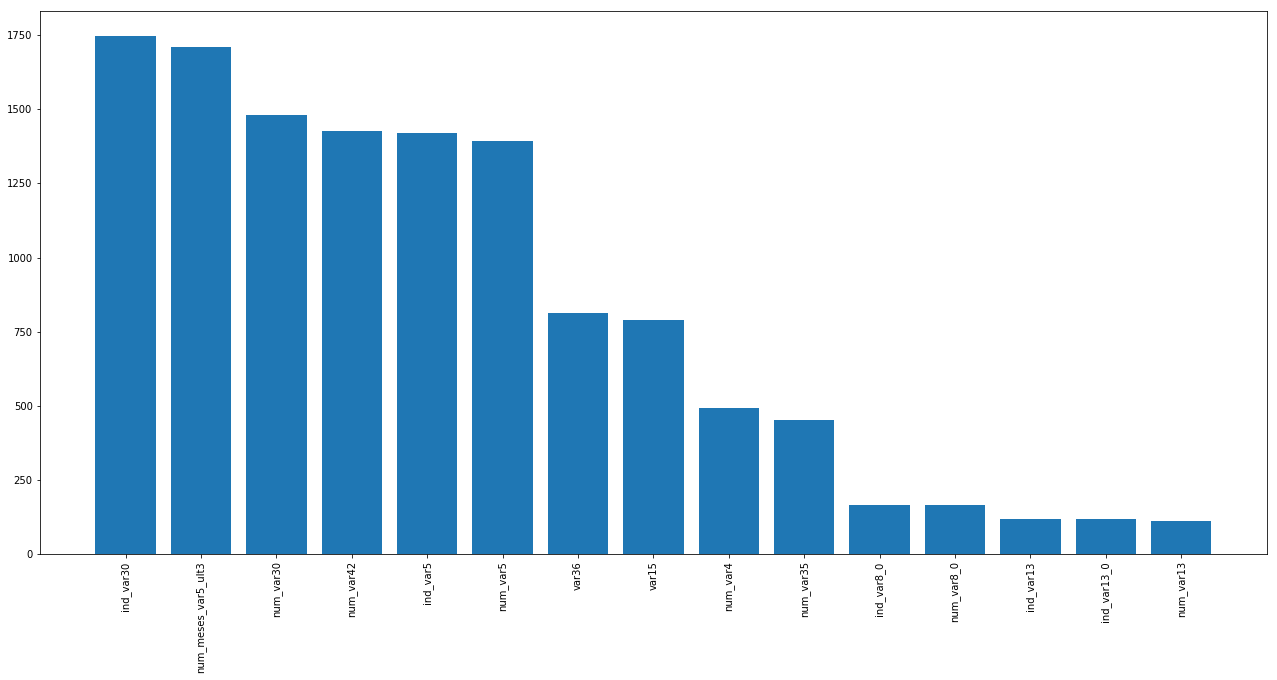

In [16]:
fclass_names = []
fclass_scores_0 = []
for i, check in enumerate(f_class.get_support()):
    if check:
        fclass_names.append(X.columns.tolist()[i])
        fclass_scores_0.append(f_class.scores_[i])
        
fclass_final = pd.DataFrame({'Feature': fclass_names, 'Score': fclass_scores_0})
fclass_final = fclass_final.sort_values('Score', axis=0, ascending=False)

f_class_df = X[fclass_final['Feature'].tolist()]

plt.subplots(figsize=(22, 10))
plt.bar(fclass_final['Feature'], fclass_final['Score'])
plt.xticks(fclass_final['Feature'], rotation=90)
plt.show()

### 1.2 mutual information

In [17]:
# now I will perform k best using MI scoring
start_time = time.time()
mi = SelectKBest(score_func=mutual_info_classif, k=k)
mi = mi.fit(X, y)

# get the data X reduced to K best features
reduced_mi = mi.transform(X)

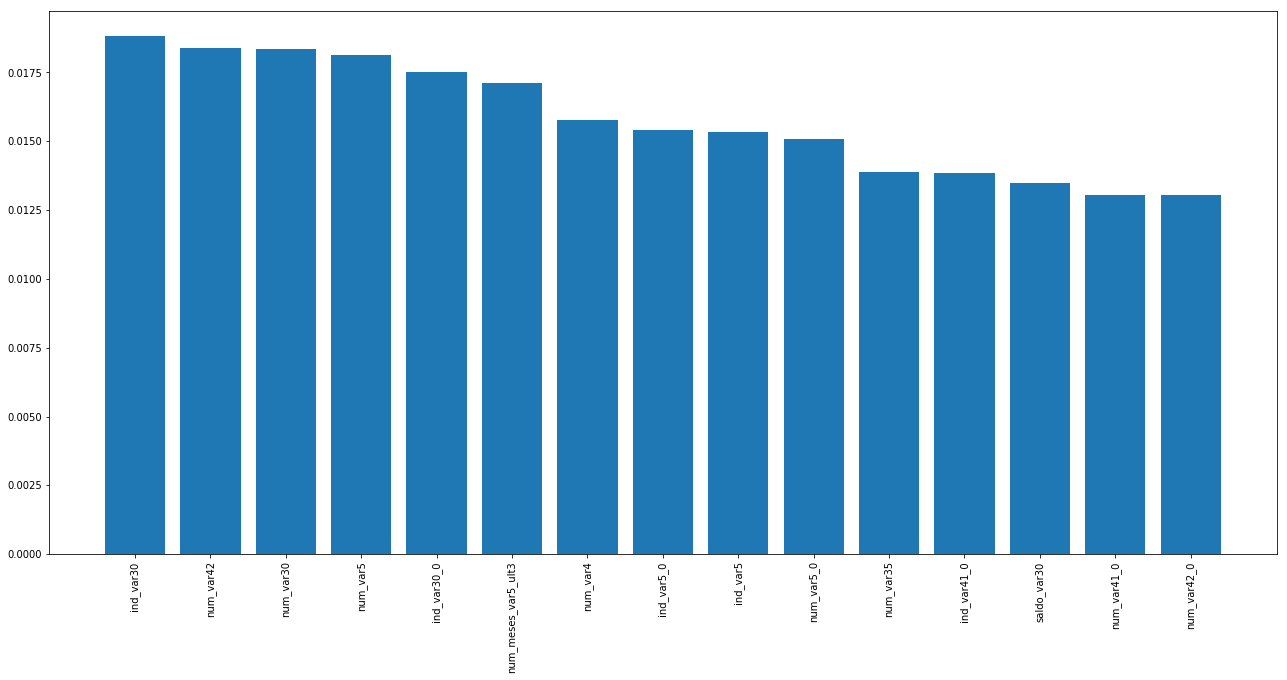

In [18]:
mi_names = []
mi_scores_0 = []
for i, check in enumerate(mi.get_support()):
    if check:
        mi_names.append(X.columns.tolist()[i])
        mi_scores_0.append(mi.scores_[i])
        
mi_final = pd.DataFrame({'Feature': mi_names, 'Score': mi_scores_0})
mi_final = mi_final.sort_values('Score', axis=0, ascending=False)

r_df_mi = X[mi_final['Feature'].tolist()]

plt.subplots(figsize=(22, 10))
plt.bar(mi_final['Feature'], mi_final['Score'])
plt.xticks(mi_final['Feature'], rotation=90)
plt.show()

### 1.3 chi squared

In [19]:
# chi^2 works for non negative features, while this data is not rescaled to [0,1], it's not possible to use chi^2

# now I will perform k best using chi algorithm
chi = SelectKBest(score_func=chi2, k=25)
# chi.fit(X, y)
time_to_train = (time.time()-start_time)/60

# get the data X reduced to K best features
# chi = mi.transform(X)
print(time_to_train)

3.3935888171195985


***
## 2. Wrapper Methods


### 2.1 RFE

In [20]:
# using recursive feature elemination
rfe = RFE(DecisionTreeClassifier(), n_features_to_select=k, step=1, verbose=1)
rfe.fit(X,y)

rfe_reduced = rfe.transform(X)

Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
F

Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 fe

In [21]:
rfe_x = pd.DataFrame(data=rfe_reduced, columns=get_labels(rfe, df)) # this is wrong. No this is correct, checked.

rfe_feat_indx = []

for i, check in enumerate(rfe.get_support()):
    if check:
        rfe_feat_indx.append(i)

for i in range(k):
    print("%d.\t%s"%(i+1, df.columns.tolist()[rfe_feat_indx[i]]))

1.	var3
2.	imp_op_var39_efect_ult3
3.	saldo_var25
4.	saldo_var40
5.	num_var22_hace2
6.	num_var22_ult1
7.	num_meses_var33_ult3
8.	num_venta_var44_ult1
9.	num_var45_hace2
10.	num_var45_ult1
11.	num_var45_ult3
12.	saldo_medio_var5_hace2
13.	saldo_medio_var5_hace3
14.	saldo_medio_var5_ult1
15.	saldo_medio_var44_ult3


***
### 2.2 Feature Importance
Using ExtraTrees Classifier.

In [22]:
# I will be using ExtraTrees to evaluate the importance of the features
extra_trees_classif = ExtraTreesClassifier(n_estimators=500, random_state=69, verbose=1)
extra_trees_classif = extra_trees_classif.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.2min finished


In [23]:
importances = extra_trees_classif.feature_importances_
indices = np.argsort(importances)[::-1]

# print the feature ranking
print("Feature ranking:")
top_k_features_x = []
top_k_features_y = []
to_df = []
fi_names = []
for i in range(k):
    print("%d. feature %s (%f)" % (i + 1, X.columns.tolist()[indices[i]], importances[indices[i]]))
    top_k_features_x.append(X.columns.tolist()[indices[i]])
    top_k_features_y.append(importances[indices[i]])
    to_df.append(X.columns.tolist()[indices[i]])
    fi_names.append(X.columns.tolist()[indices[i]])

feature_importance_df = df[to_df]

Feature ranking:
1. feature var38 (0.394194)
2. feature var15 (0.164728)
3. feature saldo_medio_var5_hace3 (0.024215)
4. feature saldo_medio_var5_ult3 (0.023509)
5. feature num_var45_ult3 (0.020471)
6. feature num_var45_hace3 (0.019229)
7. feature num_var45_hace2 (0.016323)
8. feature num_var22_ult3 (0.013961)
9. feature num_var45_ult1 (0.012640)
10. feature saldo_medio_var5_hace2 (0.012542)
11. feature num_med_var45_ult3 (0.012147)
12. feature num_var22_hace3 (0.011425)
13. feature saldo_medio_var5_ult1 (0.011064)
14. feature num_var22_hace2 (0.010957)
15. feature saldo_var30 (0.010920)


Text(0.5,1,'Feature importances')

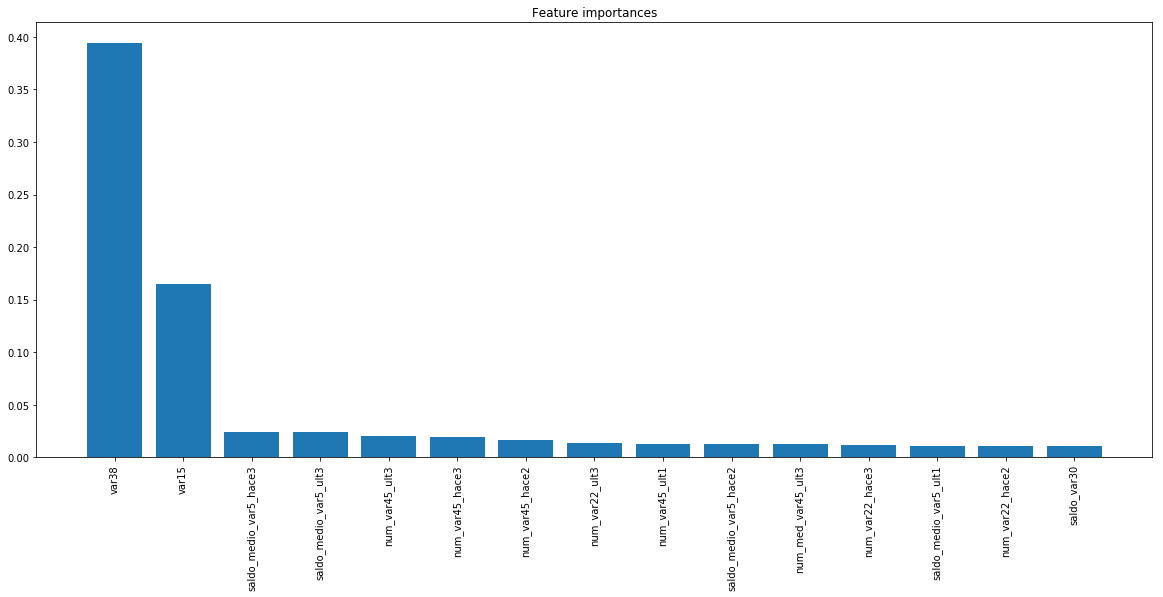

In [24]:
# plot feature importance score
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(top_k_features_x, top_k_features_y)
plt.xticks(top_k_features_x, fi_names, rotation=90)
ax.set_title("Feature importances")

***
### 2.3 Single Feature Performance

(min,mean,max) AUC = (0.495,0.516,0.713). took 0.37 minutes


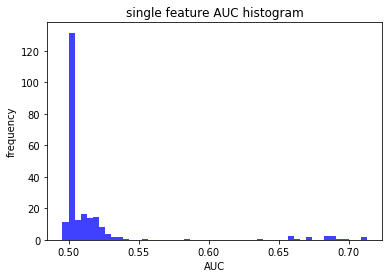

In [25]:
#%% look at single feature performance

verySimpleLearner = GradientBoostingClassifier(n_estimators=10, max_features=1, max_depth=3,
                                                        min_samples_leaf=100,learning_rate=0.3, subsample=0.65,
                                                        loss='deviance', random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=1)
        
startTime = time.time()
singleFeatureAUC_list = []
singleFeatureAUC_dict = {}
for feature in X_train.columns:
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    trainAUC = auc(y_train, verySimpleLearner.predict_proba(trainInputFeature)[:,1])
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
        
    singleFeatureAUC_list.append(validAUC)
    singleFeatureAUC_dict[feature] = validAUC
        
validAUC = np.array(singleFeatureAUC_list)
timeToTrain = (time.time()-startTime)/60
print("(min,mean,max) AUC = (%.3f,%.3f,%.3f). took %.2f minutes" %(validAUC.min(),validAUC.mean(),validAUC.max(), timeToTrain))

# show the scatter plot of the individual feature performance 
plt.figure(); plt.hist(validAUC, 50, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('AUC'); plt.ylabel('frequency'); plt.title('single feature AUC histogram'); plt.show()

In [26]:
# create a table with features sorted according to AUC
singleFeatureTable = pd.DataFrame(index=range(len(singleFeatureAUC_dict.keys())), columns=['feature','AUC'])
for ki,key in enumerate(singleFeatureAUC_dict):
    singleFeatureTable.ix[ki,'feature'] = key
    singleFeatureTable.ix[ki,'AUC'] = singleFeatureAUC_dict[key]
singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

In [27]:
# dataframe of best feature of this method
singleFeatureDF = df[singleFeatureTable.ix[:k-1,:]['feature'].tolist()]

singleFeatureTable.ix[:k,:]

feature       AUC
0              saldo_var30  0.712831
1                    var15  0.708726
2   saldo_medio_var5_hace2  0.696607
3              saldo_var42  0.694954
4                 num_var4  0.689323
5                num_var35  0.689004
6    saldo_medio_var5_ult1  0.687814
7               saldo_var5  0.684842
8    saldo_medio_var5_ult3  0.683425
9      num_meses_var5_ult3  0.682985
10  saldo_medio_var5_hace3  0.671465
11               num_var30  0.671324
12               ind_var30  0.663864
13               num_var42  0.660656
14                ind_var5  0.658915
15                num_var5  0.658915

Text(0.5,1,'Feature importances')

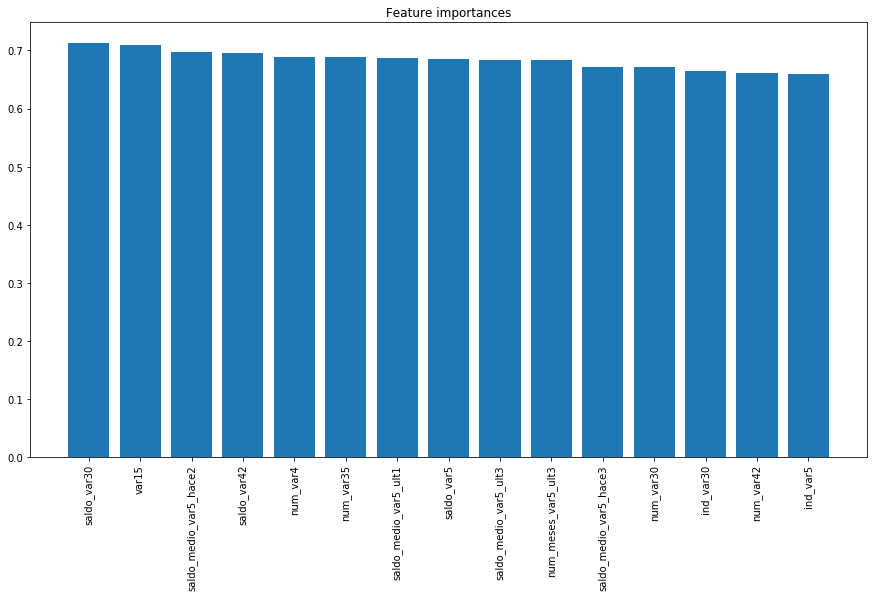

In [28]:
fig, ax = plt.subplots(figsize=(k, 8))
ax.bar(singleFeatureTable['feature'][:k], singleFeatureTable['AUC'][:k])
plt.xticks(singleFeatureTable['feature'][:k], rotation=90)
ax.set_title("Feature importances")

***
# 2. Testing
Testing the performance of the sets of features that resulted from the previous section.

In [29]:
# build a function that take classifier, df and returns the AUROC socre.

'''
So, what I'm thinking of now is a function that takes a list of classifiers and dictionary of DFs that consists of
the name of the feature selection method and the DF with only the selected features applied in the format of
{name of method: df}.
The function would iterate through the list of classifiers, and then train that classifier with all of the DFs and
store the AUROC score of each DF trained using each classifier, then that dictionary is returned.

Hold on, hold on. This would result 
in a hell of time complexity. 
Like O(n^3) time complexity. 
Prof. Menai wouldn't approve of this.
'''

def train_func(classifier, df):
    
    # I would get X from input: df, and use the global y for test train split.
    X_training, X_testing, y_training, y_testing = train_test_split(df, y, test_size=0.4, random_state=1337)
    
    # fit the model. Should make sure that the model has a fit() fucntion
    classifier.fit(X_training, y_training)
    
    # predicting values
    y_pred = classifier.predict(X_testing)
    # y_pred = cross_val_predict(classifier, df, y, cv=5)
    
    # for debugging purposes
#     print("y_pred: {}".format(np.unique(y_pred)))
#     print("y_testing: {}".format(np.unique(y_testing)))
#     print(df.columns.tolist()[0])
#     print(classifier)
    
    # computing AUROC
    roc_score = auc(y_pred, y_testing)
    
    # useless comment
    return roc_score

In [30]:
# putting the reduced data frame in a dictionary to iterate through them and automate the proccess

reduced_dfs = {'F Class': f_class_df, 'Mutual Information': r_df_mi, 'RFE': rfe_x,
               'Feature Importance': feature_importance_df, 'Single Feature Performane': singleFeatureDF}

# Building classifiers

# DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

# GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# GaussianNB
gnb = GaussianNB()

# list of classifiers
list_class = {dtc: 'DecisionTreeClassifier', gbc: 'GradientBoostingClassifier', gnb: 'GaussianNB'}

# dictionary of results
# total_result should look like: {class: {df_name: df_score}, class2: {df_name: df_score}}
total_results = {}

In [31]:
for i in reduced_dfs:
    print("DF: %s |Len: %d" % (str(i), len(reduced_dfs[i].columns)))

DF: F Class |Len: 15
DF: Mutual Information |Len: 15
DF: RFE |Len: 15
DF: Feature Importance |Len: 15
DF: Single Feature Performane |Len: 15


In [32]:
# iteraring through classifiers and DFs
for i in list_class:
    classifier = i
    classifier_name = list_class[classifier]
    classifier_results = {} # store AUROC result in dictionary {df_name: df_score}
    
    for j in reduced_dfs:
        df_name = j
        current_df = reduced_dfs[df_name]
        
        # storing as {df_name: df_score}
        classifier_results[df_name] = train_func(classifier, current_df)
        
    total_results[classifier_name] = classifier_results

In [33]:
f_class_results = []
mi_results = []
rfe_results = []
fi_results = []
sf_results = [] # not San Fransisco results, it's single feature results

for i in total_results:
    for j in total_results[i]:
        if j=='F Class':
            f_class_results.append(total_results[i][j])
        elif j=='Feature Importance':
            fi_results.append(total_results[i][j])
        elif j=='Mutual Information':
            mi_results.append(total_results[i][j])
        elif j=='RFE':
            rfe_results.append(total_results[i][j])
        elif j=='Single Feature Performane':
            sf_results.append(total_results[i][j])
print("Fclass avg: {:.3f}\nMI avg: {:.3f}\nRFE avg: {:.3f}\nFI avg: {:.3f}\nSF avg: {:.3f}\n".format(
    np.mean(f_class_results), np.mean(mi_results), np.mean(rfe_results), np.mean(fi_results), np.mean(sf_results)))

Fclass avg: 0.498
MI avg: 0.512
RFE avg: 0.543
FI avg: 0.539
SF avg: 0.550



#### The Feature Impotrance reduced dataset seems to be doing better than the other data sets on the classifiers
By looking at the results above, and the correlation matrecies below, I think it's safe to assume that the `feature_importance_df` set would be a good choice.
<br>So, I'll continue with this dataset as the main dataset

In [87]:
# Therefor, I will set the 'main_df' variable to feature_importance_df

main_x = X[feature_importance_df.columns]
main_y = y
test_x = test_on[feature_importance_df.columns]

***
## Next step is doing some visualization, and try to interpret whatever I can from the visualization.

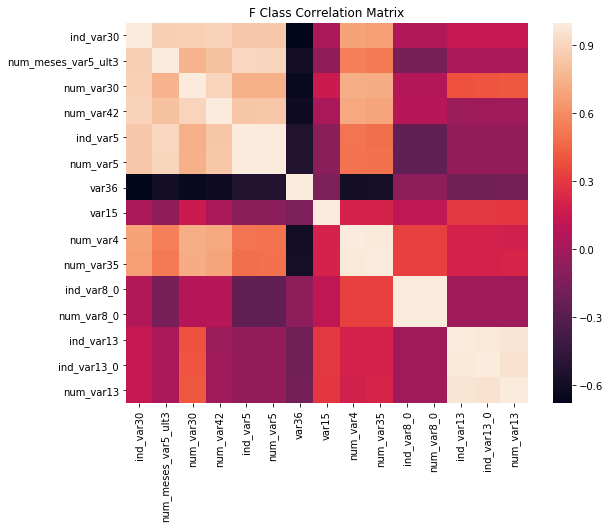

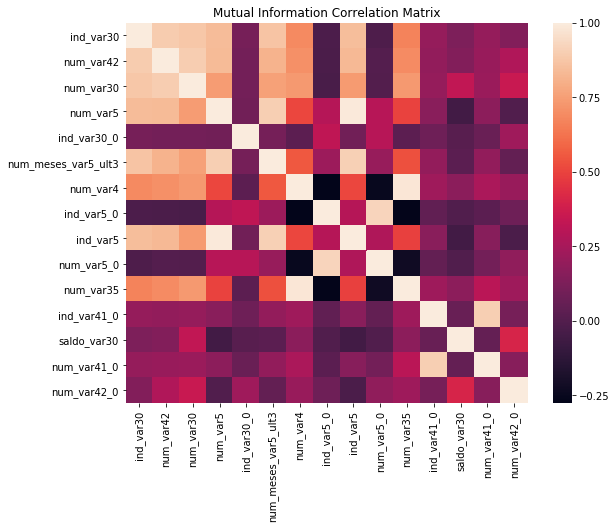

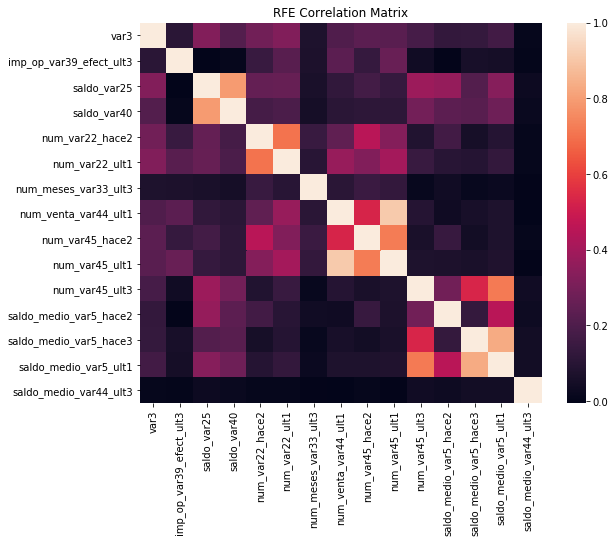

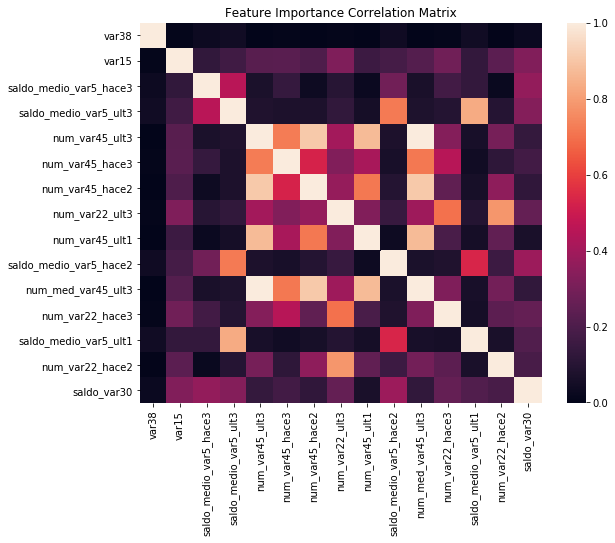

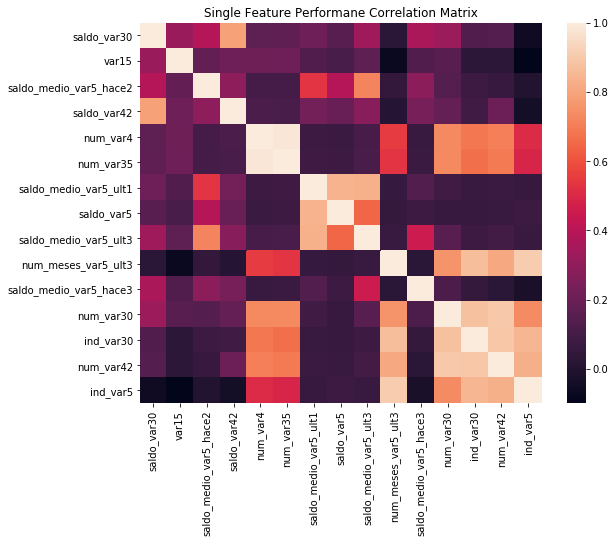

In [35]:
# Doing this manually because I'm too tired to think about automation it.
# NOW MY PERFECTIONISIM KICKS IN AND I WILL SPEND THREE HOURS PUTTING THIS INTO A LOOP. *Sigh*
# Well, that went surprisingly smooth.

for i in reduced_dfs:
    
    tmp_df = reduced_dfs[i]
    plt.figure(figsize=(9,7))
    plt_title = i + " Correlation Matrix"
    plt.title(plt_title)
    plt.show(hm(tmp_df.corr()))

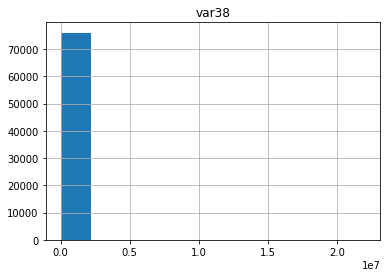

<Figure size 720x720 with 0 Axes>

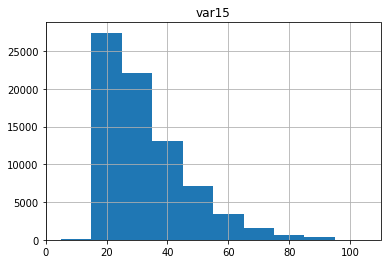

<Figure size 720x720 with 0 Axes>

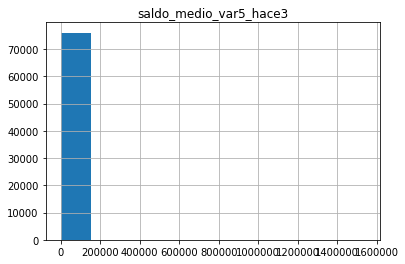

<Figure size 720x720 with 0 Axes>

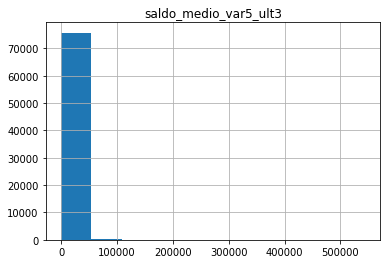

<Figure size 720x720 with 0 Axes>

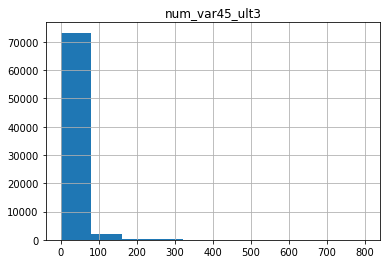

<Figure size 720x720 with 0 Axes>

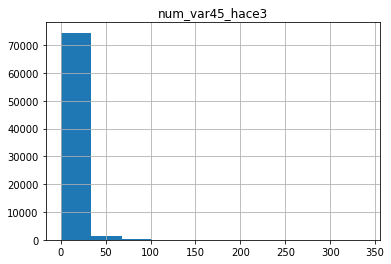

<Figure size 720x720 with 0 Axes>

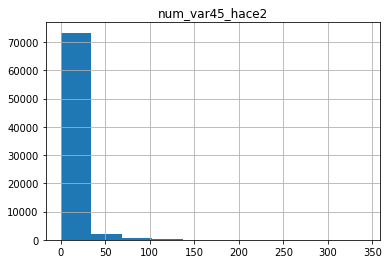

<Figure size 720x720 with 0 Axes>

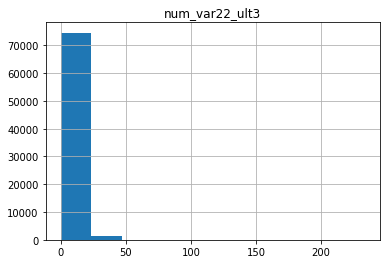

<Figure size 720x720 with 0 Axes>

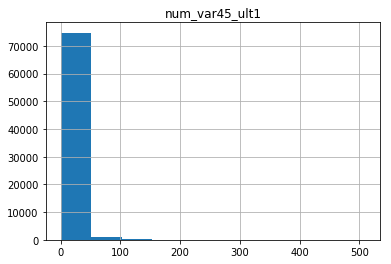

<Figure size 720x720 with 0 Axes>

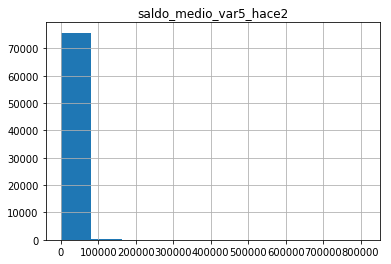

<Figure size 720x720 with 0 Axes>

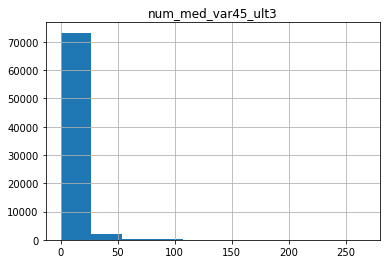

<Figure size 720x720 with 0 Axes>

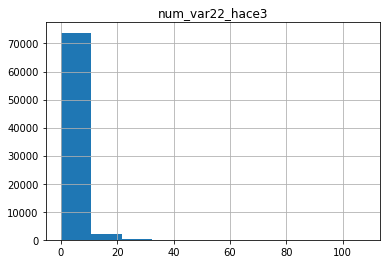

<Figure size 720x720 with 0 Axes>

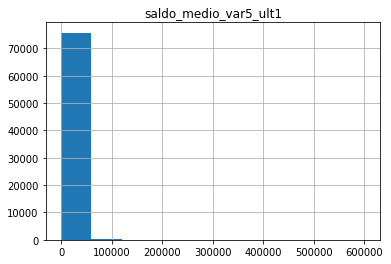

<Figure size 720x720 with 0 Axes>

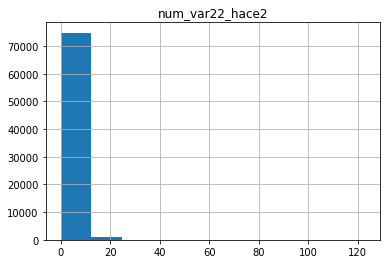

<Figure size 720x720 with 0 Axes>

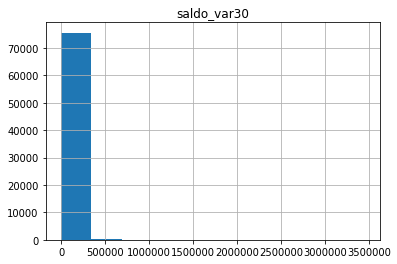

<Figure size 720x720 with 0 Axes>

In [76]:
for i in main_x.columns.tolist():
    main_x[i].hist()
    plt.title(i)
    plt.figure(figsize=(10,10))
    plt.show()

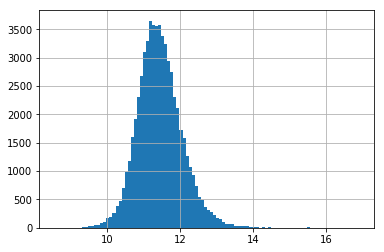

In [85]:
main_x.loc[~np.isclose(main_x.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

***

In [140]:
X_tr, X_tst, y_tr, y_tst = train_test_split(main_x, y, test_size=0.15, random_state=42)

In [139]:
# First I will build my benchmark model

# Random Forest Classi for Benchmarking
rfc = RandomForestClassifier()
rfc.fit(main_x, main_y)
rfc_pred = rfc.predict_proba(test_on[main_x.columns])
submission = pd.DataFrame({"ID":id_test, "TARGET":rfc_pred[:,1]})
submission.to_csv("submissions/rfc_fi.csv", index=False)

<img src='scores/rfc_sf.png'>

### As we can see, this is score for this model after submitting the predictions on Kaggle. I will be using this score as a benchmark

### Training models

In [44]:
# SVM
svm = SVC(random_state=3212, probability=True)
svm.fit(main_x, main_y)
svm_predx = svm.predict_proba(test_on[feature_importance_df.columns])[:,1]

submission = pd.DataFrame({"ID":id_test, "TARGET":svm_pred})
submission.to_csv('submissions/svm_fi_basic.csv', index=False)

In [38]:
# test_on = df_test.drop('ID', axis=1)
# id_test = df_test['ID']
# train_on = df.drop(['ID', 'TARGET'], axis=1)
# labels = df['TARGET']

In [39]:
# XGBoost
xgb_classi = xgb.XGBClassifier()
xgb_classi.fit(X_tr, y_tr)
xgb_pred = xgb_classi.predict_proba(X_tst)
xgb_auc = auc(y_tst, xgb_pred[:,1])
print(xgb_auc)

0.8224469976713852


In [186]:
xgb_pred = xgb_classi.predict_proba(test_on[main_x.columns])[:,1]
submission = pd.DataFrame({"ID":id_test, "TARGET":xgb_pred})
submission.to_csv("submissions/submission_xgb_sf_parameters.csv", index=False) # XGB, Single Feature

In [178]:
# Neural Network

scaler = StandardScaler()
scaler.fit(X_tr)
mlp_X_tr = scaler.transform(X_tr)

In [181]:
mpl = MLPClassifier(hidden_layer_sizes=(64, 32, 64, 8), activation='relu', 
     beta_1=0.9, beta_2=0.999, alpha = 0.01, early_stopping = True, validation_fraction = 0.25,
     learning_rate_init=0.001, max_iter = 8000, random_state = 1235, 
     learning_rate='adaptive')
mpl.fit(X_tr, y_tr)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(64, 32, 64, 8), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=8000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1235,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.25,
       verbose=False, warm_start=False)

In [183]:
mpl_pred = mpl.predict_proba(X_te)[:,1]
auc(y_te, mpl_pred)

0.6145804820498101

In [184]:
mpl_pred = mpl.predict_proba(test_on[main_x.columns])[:,1]
submission = pd.DataFrame({"ID":id_test, "TARGET":mpl_pred})
submission.to_csv("submissions/mlp_sf.csv", index=False)

In [194]:
# training all sets of features on a basic XGBoost model

for j in reduced_dfs:
    if j=='F Class':
        name = 'fclass'
    elif j=='Feature Importance':
        name = 'fi'
    elif j=='Mutual Information':
        name = 'mi'
    elif j=='RFE':
        name = 'rfe'
    elif j=='Single Feature Performane':
        name = 'sf'
    current_data = reduced_dfs[j]
    tmp_model = xgb.XGBClassifier() # Basic model with default parameters
    tmp_model.fit(X[current_data.columns], y)
    tmp_model_pred = tmp_model.predict_proba(test_on[current_data.columns])[:,1]
    submission = pd.DataFrame({"ID":id_test, "TARGET":tmp_model_pred})
    submission.to_csv('submissions/xgb_'+ name +'_basic.csv', index=False)

In [197]:
# training all sets of features on a Neural Network

for j in reduced_dfs:
    if j=='F Class':
        name = 'fclass'
    elif j=='Feature Importance':
        name = 'fi'
    elif j=='Mutual Information':
        name = 'mi'
    elif j=='RFE':
        name = 'rfe'
    elif j=='Single Feature Performane':
        name = 'sf'
        
    current_data = reduced_dfs[j].columns

    mpl = MLPClassifier(hidden_layer_sizes=(64, 32, 64, 8), activation='relu', 
         beta_1=0.9, beta_2=0.999, alpha = 0.01, early_stopping = True, validation_fraction = 0.25,
         learning_rate_init=0.001, max_iter = 8000, random_state = 1235, 
         learning_rate='adaptive')

    mpl.fit(X[current_data], y)
    mpl_pred = mpl.predict_proba(test_on[current_data])[:,1]

    submission = pd.DataFrame({"ID":id_test, "TARGET":mpl_pred})
    submission.to_csv('submissions/mlp_'+ name +'.csv', index=False)

<img src='scores/xgb_basic/xgb_fi_basic.png'>

### From the scores of the submissions, I will be choosing XGB as the model to continue with and to tune further to acheive better performance

***

# 3. Fine tuning

### After selecting XGBoost, I will fine tune an XGBoost classifier to further improve its' performance 

In [54]:
fine_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=3, seed=3212)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3212)

In [75]:
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 5],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.6, 1.0],
    'max_depth': [2, 4, 6]
    }
gscv = GridSearchCV(fine_xgb, param_grid=param_grid, scoring='roc_auc',
        n_jobs=4, iid=True, cv=kfold.split(main_x, main_y), verbose=1)
start_time = time.time()
gscv.fit(main_x, main_y)
total_time = (time.time() - start_time)/60
print(total_time)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  7.6min finished


7.623125366369883


In [74]:
fine_xgb_pred = gscv.predict_proba(test_x)
submission = pd.DataFrame({"ID":id_test, "TARGET":fine_xgb_pred[:,1]})
submission.to_csv("submissions/xgb_fi_fine_3.csv", index=False)

In [86]:
gscv.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 4,
 'min_child_weight': 10,
 'subsample': 1.0}

***
## ***

In [108]:
corrs = []
for i in df.columns.tolist(): 
    correlation = df['var38'].corr(df[i])
    corrs.append(correlation)
    print('Correlation between "var38" and ' + i + ' = %.3f'%correlation)

Correlation between "var38" and ID = -0.006
Correlation between "var38" and var3 = 0.000
Correlation between "var38" and var15 = 0.006
Correlation between "var38" and imp_ent_var16_ult1 = 0.000
Correlation between "var38" and imp_op_var39_comer_ult1 = 0.013
Correlation between "var38" and imp_op_var39_comer_ult3 = 0.013
Correlation between "var38" and imp_op_var40_comer_ult1 = 0.017
Correlation between "var38" and imp_op_var40_comer_ult3 = 0.016
Correlation between "var38" and imp_op_var40_efect_ult1 = -0.000
Correlation between "var38" and imp_op_var40_efect_ult3 = 0.001
Correlation between "var38" and imp_op_var40_ult1 = 0.004
Correlation between "var38" and imp_op_var41_comer_ult1 = 0.008
Correlation between "var38" and imp_op_var41_comer_ult3 = 0.009
Correlation between "var38" and imp_op_var41_efect_ult1 = 0.002
Correlation between "var38" and imp_op_var41_efect_ult3 = 0.001
Correlation between "var38" and imp_op_var41_ult1 = 0.005
Correlation between "var38" and imp_op_var39_efec

Correlation between "var38" and imp_aport_var13_hace3 = 0.019
Correlation between "var38" and imp_aport_var13_ult1 = 0.004
Correlation between "var38" and imp_aport_var17_hace3 = 0.005
Correlation between "var38" and imp_aport_var17_ult1 = 0.001
Correlation between "var38" and imp_aport_var33_hace3 = 0.004
Correlation between "var38" and imp_aport_var33_ult1 = 0.001
Correlation between "var38" and imp_var7_emit_ult1 = 0.003
Correlation between "var38" and imp_var7_recib_ult1 = -0.001
Correlation between "var38" and imp_compra_var44_hace3 = 0.003
Correlation between "var38" and imp_compra_var44_ult1 = 0.003
Correlation between "var38" and imp_reemb_var13_ult1 = 0.002
Correlation between "var38" and imp_reemb_var17_hace3 = 0.004
Correlation between "var38" and imp_reemb_var17_ult1 = 0.002
Correlation between "var38" and imp_reemb_var33_ult1 = 0.002
Correlation between "var38" and imp_var43_emit_ult1 = 0.003
Correlation between "var38" and imp_trans_var37_ult1 = 0.004
Correlation between 

In [111]:
wowpoplol = np.argsort(corrs)[::-1]

In [112]:
wowpoplol

array([306, 271, 270, 129, 268, 269, 144, 136, 153, 133, 282, 175, 283,
       151, 280,  79, 281,   6,  85,  30,  36,   7, 109, 134,  28,  80,
         5,  31,  81,  32, 286,   4, 287, 228, 227,  53,  43,  91, 284,
        77, 208, 128, 139, 173,  29,  78,  20,  68,  63, 238, 121,  44,
        92,  83,  82,  34, 278,  33,  45, 132,  93, 279, 141, 235,  94,
        46, 237, 276,  12,  54, 239, 191, 229, 256, 206,  66, 126, 124,
       207,  58,  11, 167, 172, 154,  90,  41,  57, 220, 233, 115, 236,
       223, 111, 243, 252,  39, 200, 145, 277, 114, 231,  99, 222,   2,
       216, 140, 265, 293, 292, 217, 100, 290, 138, 156, 168, 112,  40,
       242, 291, 177,  18, 263, 285, 107, 152,  15, 209, 150, 179, 298,
       254,  37, 301,  21, 249, 186, 300,  69, 108, 147, 161, 215, 103,
       190, 122,  64, 176, 303, 160, 248,  67, 127,  10, 210,  88, 104,
        19, 183,  86,  97, 219, 304, 181, 305, 302, 143, 171, 159,  89,
       189, 142, 184, 105, 131, 212, 255, 185, 162, 251, 188, 10

In [134]:
attrib = 129
print(corrs[attrib])
df.columns.tolist()[attrib]

corr_feat = []
corr_score = []

for i in range(1, 26):
    indeinde = wowpoplol[i]
    corr_feat.append(df.columns.tolist()[indeinde])
    corr_score.append(corrs[indeinde])

0.03916852287295681


In [135]:
var38_corr = pd.DataFrame({'correlation': corr_score, 'feature': corr_feat}, index=range(1,26))

([<matplotlib.axis.XTick at 0x198a42be0>,
 <a list of 25 Text xticklabel objects>)

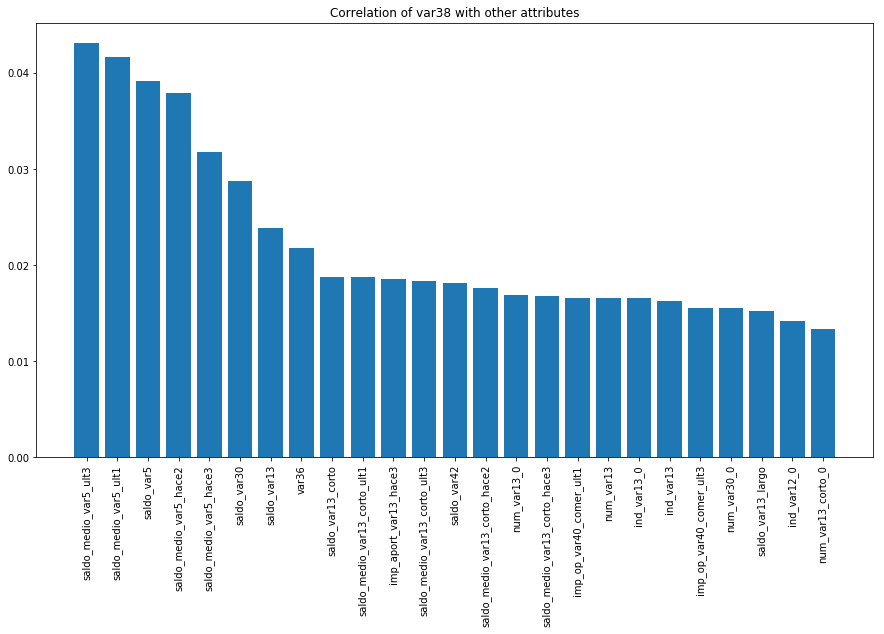

In [138]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(corr_feat, corr_score)
plt.title('Correlation of var38 with other attributes')
plt.xticks(corr_feat, rotation=90)